In [2]:
import quandl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [34]:
quandl.ApiConfig.api_key = os.environ['QUANDL_API_KEY']

def get_codes(df, in_name):
    code_list = df[df['name'].str.contains(in_name)]['code'].values.tolist()
    return code_list
    
def get_data(code, start=None, end=None):
    """
    sample param start end '2025-12-31'
    """
    query = 'BUNDESBANK/{}'.format(code)
    if start and end:
        return quandl.get(query, start_date=start, end_date=end)
    else:
        return quandl.get(query)

In [35]:
code_list = get_codes(df, "dax")
data_to_fetch = df[df['code'].isin(code_list)]

In [39]:
dset = {}
codes = data_to_fetch.code.values.tolist()
for i in codes: 
    dset[i] = get_data(i)


In [52]:
codes

['BBK01_WU3140', 'BBK01_WU3141', 'BBK01_WU001A', 'BBK01_WU018A']

In [45]:
df[df['code']=='BBK01_WU3140'].name.values

array(['dax price index / end 1987 = 1000 / end of month\n'], dtype=object)

In [48]:
d = dset['BBK01_WU3140']

In [50]:
d = d.reset_index()

In [58]:
d['day'] = d['Date'].apply(lambda x: x.day)

In [59]:
d['dayofweek'] = d['Date'].apply(lambda x: x.dayofweek)
d['year'] = d['Date'].apply(lambda x: x.year)
d['month'] = d['Date'].apply(lambda x: x.month)
d['week'] = d['Date'].apply(lambda x: x.week)

In [75]:
d['Value_-1'] = d['Value'].shift(-1)
d['Value_+1'] = d['Value'].shift(1)

In [78]:
d['future_change'] = d.apply(lambda row: (1 - row['Value'] / row['Value_-1']) * 100, axis=1 )
d['curr_change'] = d.apply(lambda row: (1 - row['Value_+1'] / row['Value']) * 100, axis=1 )

In [80]:
d = d.dropna()

In [81]:
d.head()

,Date,Value,day,dayofweek,year,month,week,Value_-1,future_change,Value_+1,curr_change
1,1988-01-31,935.73,31,6,1988,1,4,1077.79,13.180675,1000.00,-6.868434
2,1988-02-29,1077.79,29,0,1988,2,9,1058.09,-1.861845,935.73,13.180675
3,1988-03-31,1058.09,31,3,1988,3,13,1048.82,-0.883850,1077.79,-1.861845
4,1988-04-30,1048.82,30,5,1988,4,17,1070.74,2.047182,1058.09,-0.883850
5,1988-05-31,1070.74,31,1,1988,5,22,1117.00,4.141450,1048.82,2.047182


In [108]:
from pandas_datareader import data, wb
import pandas_datareader.data as web
import datetime

In [121]:
# start = datetime.datetime(2010, 1, 1)
# end = datetime.datetime(2013, 1, 27)
# f = web.DataReader('F','google', start, end)

In [104]:
f = web.DataReader('DAX', 'stooq')

In [106]:
f.shape

(1128, 5)

In [129]:
f.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-07,26.5500,26.6000,26.2233,26.5400,5323
2019-06-06,26.3263,26.3263,26.3263,26.3263,406
2019-06-05,26.1162,26.1162,26.1162,26.1162,100
2019-06-04,26.1500,26.1662,25.8900,26.0900,10438
2019-06-03,25.6600,25.8300,25.6500,25.8250,10660


In [96]:
d.shape

(376, 13)

In [114]:
def get_bin(x):
    if x >= 0:
        return 1
    else:
        return 0
    
def get_close_status(x):
    if x > 0:
        return 1
    elif x==0:
        return 0
    else:
        return -1

In [93]:
d['bin'] = d['curr_change'].apply(get_bin)
d['bin_cum'] = d['bin'].cumsum()
d['close_status'] = d['curr_change'].apply(get_close_status)
d['close_status_cum'] = d['close_status'].cumsum()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
d[['Value', 'month', 'curr_change', 'bin']].groupby('month').mean()

,Value,curr_change,bin
month,,,
1,3420.721250,0.016350,0.593750
2,3447.156875,0.880892,0.531250
3,3483.932500,0.748290,0.500000
4,3542.365313,1.687519,0.687500
5,3444.592903,-0.565703,0.548387
6,3412.660000,-0.528009,0.451613
7,3450.814194,1.131297,0.580645
8,3352.719355,-2.803302,0.483871
9,3292.178387,-3.003700,0.419355


In [89]:
d.head()

,Date,Value,day,dayofweek,year,month,week,Value_-1,future_change,Value_+1,curr_change,bin
1,1988-01-31,935.73,31,6,1988,1,4,1077.79,13.180675,1000.00,-6.868434,0
2,1988-02-29,1077.79,29,0,1988,2,9,1058.09,-1.861845,935.73,13.180675,1
3,1988-03-31,1058.09,31,3,1988,3,13,1048.82,-0.883850,1077.79,-1.861845,0
4,1988-04-30,1048.82,30,5,1988,4,17,1070.74,2.047182,1058.09,-0.883850,0
5,1988-05-31,1070.74,31,1,1988,5,22,1117.00,4.141450,1048.82,2.047182,1


In [125]:

d['Value_norm'] = d['Value']/d['Value'].max() *100
d['close_status_cum_norm'] = d['close_status_cum']/d['close_status_cum'].max() *100

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


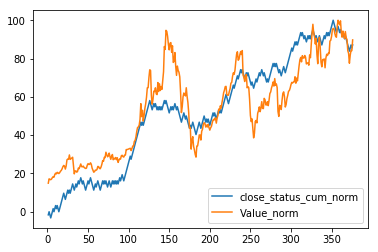

In [126]:
d[['close_status_cum_norm', 'Value_norm']].plot()

In [127]:
d.tail()

,Date,Value,day,dayofweek,year,month,week,Value_-1,future_change,Value_+1,curr_change,bin,bin_cum,close_status,close_status_cum,Value_norm,close_status_cum_norm
372,2018-12-31,4862.74,31,0,2018,12,1,5128.61,5.184056,5185.50,-6.637410,0,212,-1,52,77.554425,83.870968
373,2019-01-31,5128.61,31,3,2019,1,5,5284.27,2.945724,4862.74,5.184056,1,213,1,53,81.794708,85.483871
374,2019-02-28,5284.27,28,3,2019,2,9,5274.00,-0.194729,5128.61,2.945724,1,214,1,54,84.277284,87.096774
375,2019-03-31,5274.00,31,6,2019,3,13,5626.34,6.262330,5284.27,-0.194729,0,214,-1,53,84.113491,85.483871
376,2019-04-30,5626.34,30,1,2019,4,18,5235.06,-7.474222,5274.00,6.262330,1,215,1,54,89.732859,87.096774


In [53]:
a = dset['BBK01_WU3140'].values

array([[1000.  ],
       [ 935.73],
       [1077.79],
       [1058.09],
       [1048.82],
       [1070.74],
       [1117.  ],
       [1148.27],
       [1132.15],
       [1217.34],
       [1263.49],
       [1239.37],
       [1289.8 ],
       [1274.77],
       [1249.72],
       [1278.73],
       [1324.78],
       [1353.48],
       [1404.6 ],
       [1475.1 ],
       [1516.28],
       [1494.04],
       [1396.82],
       [1496.07],
       [1698.07],
       [1726.59],
       [1714.24],
       [1859.92],
       [1713.18],
       [1735.44],
       [1755.1 ],
       [1783.68],
       [1514.34],
       [1240.55],
       [1331.25],
       [1338.12],
       [1295.71],
       [1315.96],
       [1429.02],
       [1409.83],
       [1483.24],
       [1564.03],
       [1476.01],
       [1469.37],
       [1494.81],
       [1455.28],
       [1431.59],
       [1417.51],
       [1424.79],
       [1523.84],
       [1575.8 ],
       [1546.62],
       [1554.18],
       [1602.91],
       [1552.4 ],
       [14

In [9]:
with open('quandl_BUNDESBANK_codes.txt') as f:
    data_list = f.readlines()

In [12]:
data_list[1].split("|")

['BBK01_JBB071',
 'Gross value added / chain index / Seasonally and working-day adjusted\n']

In [16]:
len(data_list)

44093

In [18]:
data = []
for d in data_list:
    line = d.split('|')
    data_dict = {}
    try:
        data_dict["code"] = line[0]
        data_dict["name"] = line[1]
        data.append(data_dict)
    except Exception as a:
        print(a)
        print("errrorr {}".format(line))

list index out of range
errrorr ['\n']


In [19]:
df = pd.DataFrame(data)

In [20]:
df.head()

,code,name
0,BBK01_JBB000,Gross domestic product / chain index / Seasona...
1,BBK01_JBB071,Gross value added / chain index / Seasonally a...
2,BBK01_JBB052,Production sector excluding construction / cha...
3,BBK01_JBB056,Construction / chain index / Seasonally and wo...
4,BBK01_JBB058,"Trade, transport, accommmodation and food serv..."


In [28]:
df['name'] = df['name'].apply(lambda x: x.lower())

In [21]:
# df.to_csv('deutshebank_codes.csv')